<a href="https://colab.research.google.com/github/RajarshiRay25/Calories-Burning-Prediction---ML/blob/main/Calories_burning_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Import Datasets

In [2]:
df_calories = pd.read_csv('./calories.csv')
df_calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [3]:
df_exercise = pd.read_csv('./exercise.csv')
df_exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [4]:
# Joining the two dataframes

main_df = pd.concat([df_exercise,df_calories['Calories']],axis='columns')
main_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [5]:
# shape of data

main_df.shape

(15000, 9)

In [6]:
# data information

main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
# data description

main_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
# check null values

main_df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#Data Analysis

In [9]:
# Graphical analysis

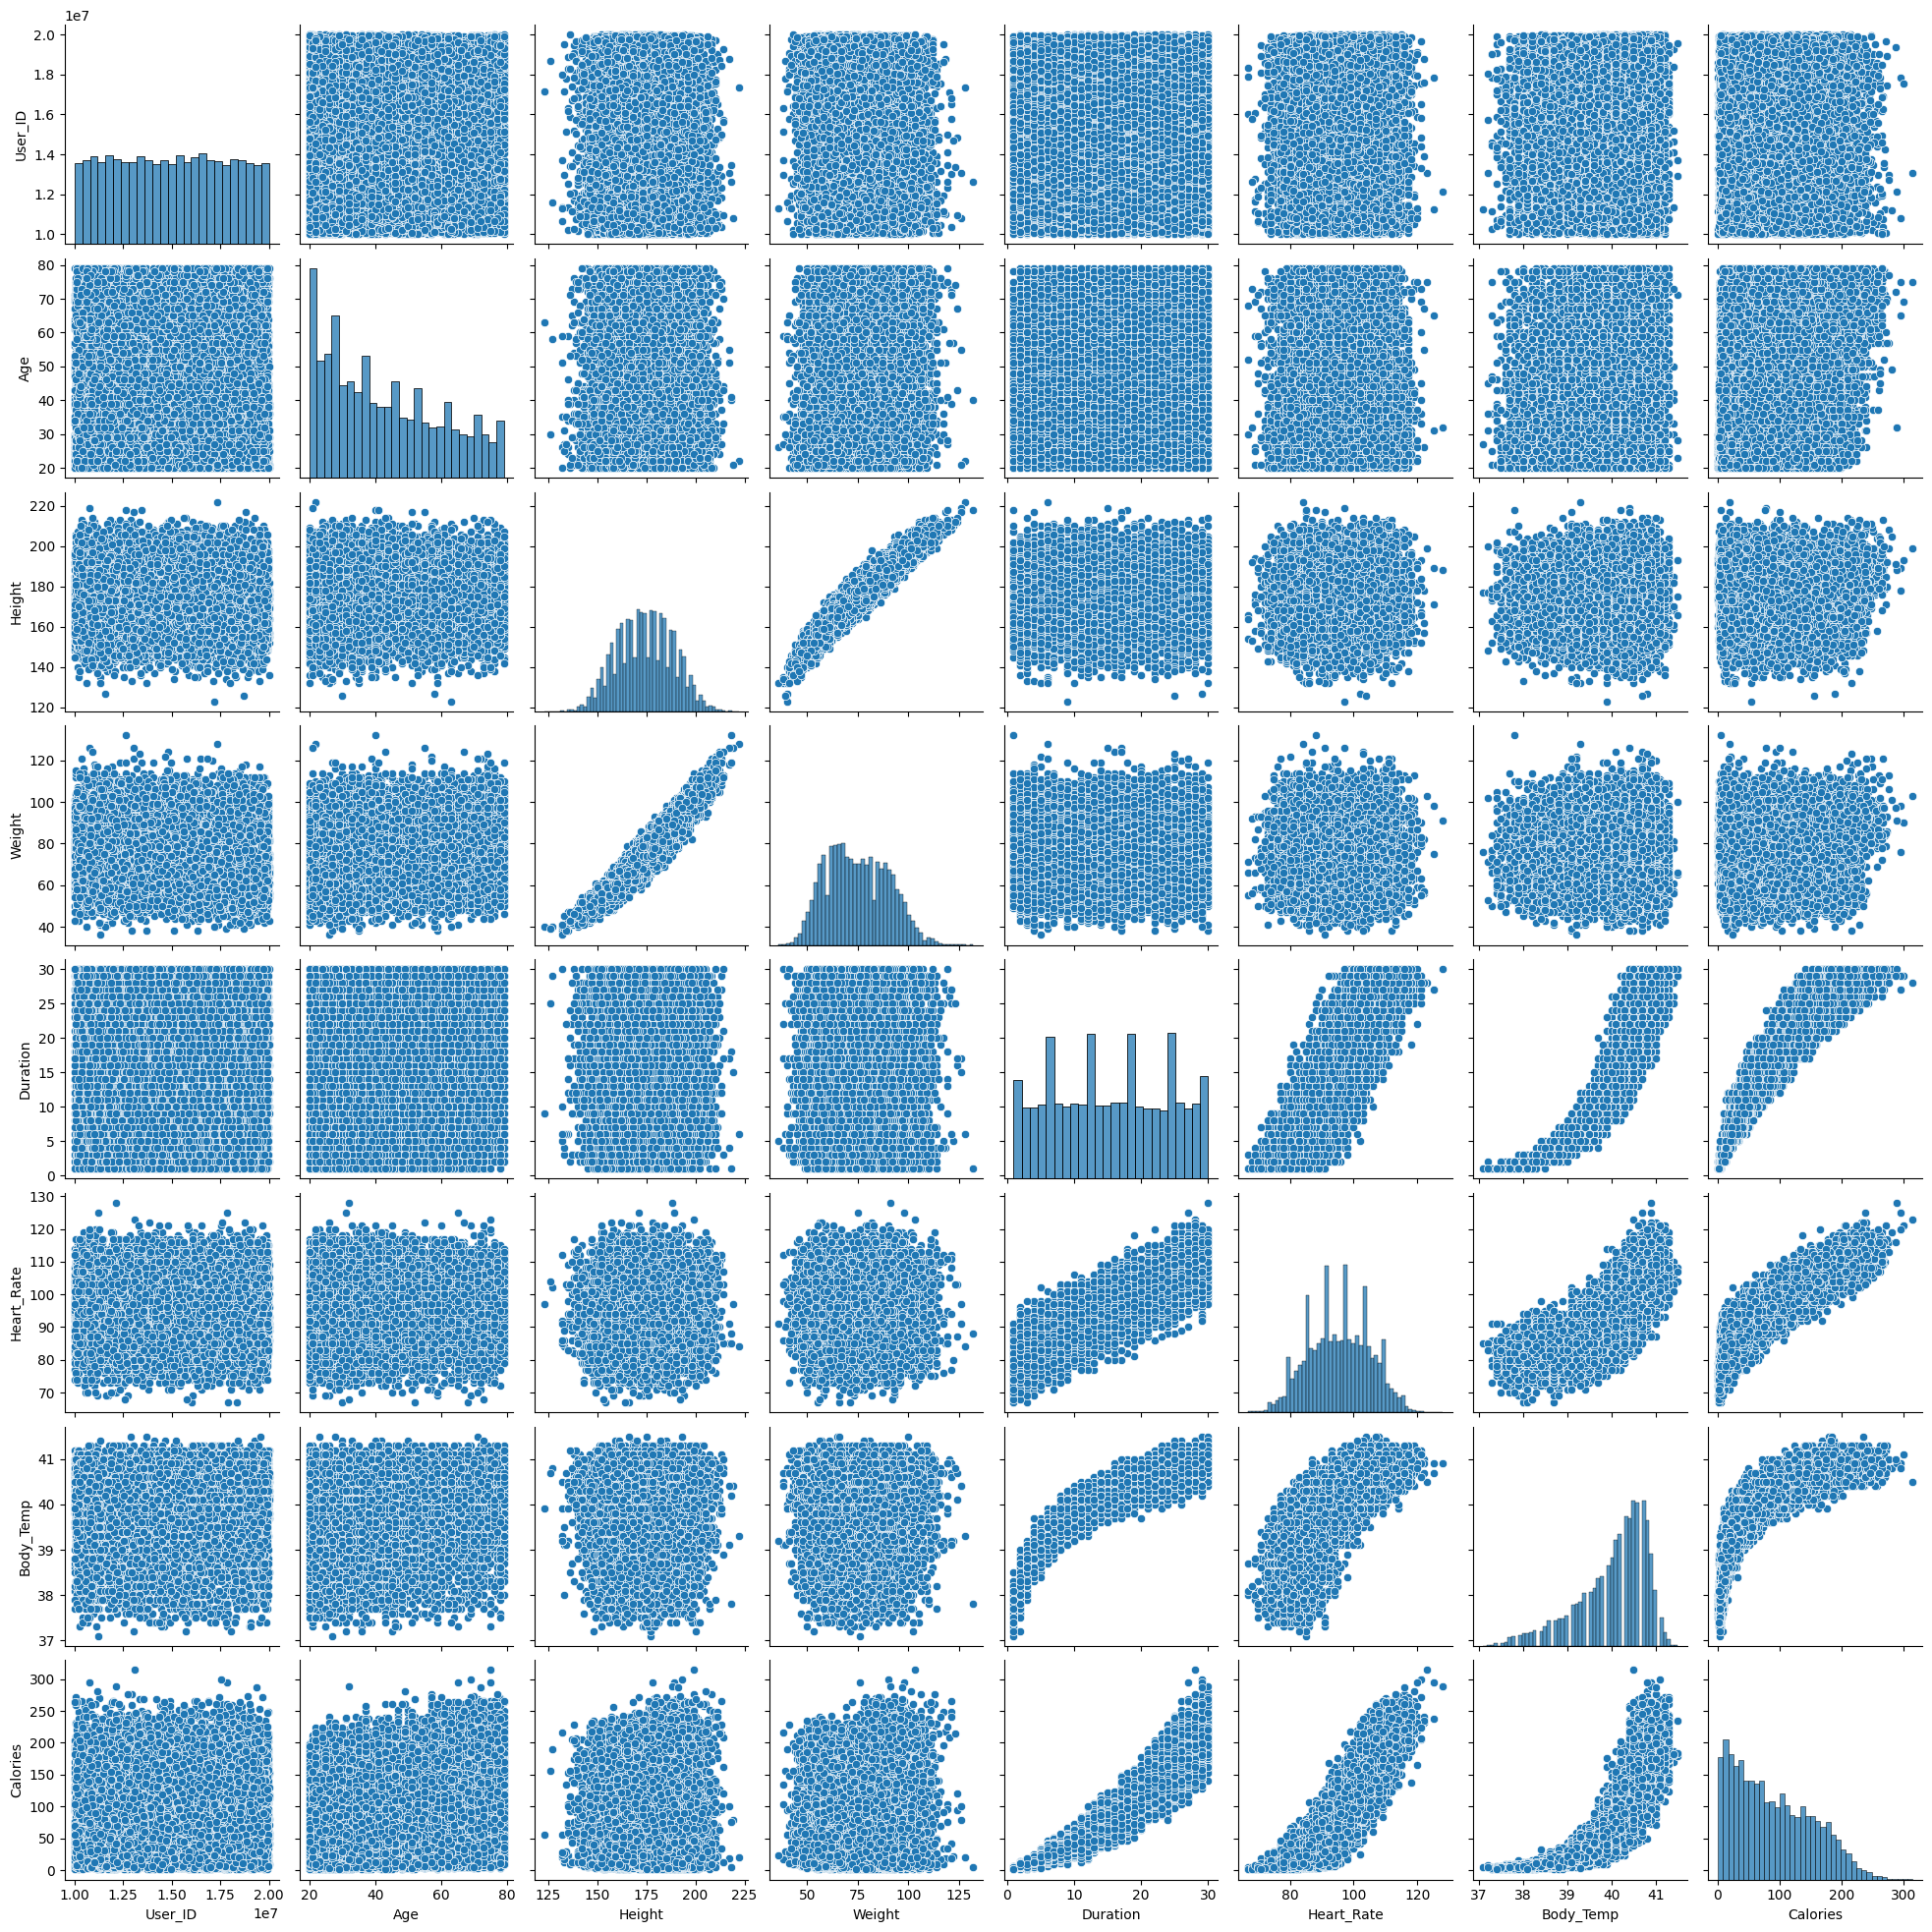

In [10]:
sns.pairplot(main_df)

<Axes: xlabel='Gender', ylabel='count'>

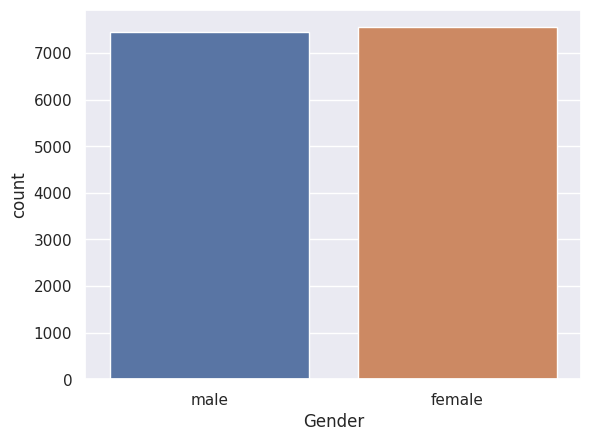

In [15]:
# Observe quantitative analysis 
sns.countplot(data = main_df,x=main_df['Gender'])

In [16]:
# Use label encoder to code for genders

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
main_df['gender_coded'] = le.fit_transform(main_df['Gender'])


In [18]:
main_df.head()

# 1  --> Male
# 0  --> Female

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,gender_coded
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,0


<ipython-input-20-937d26bc1ec6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

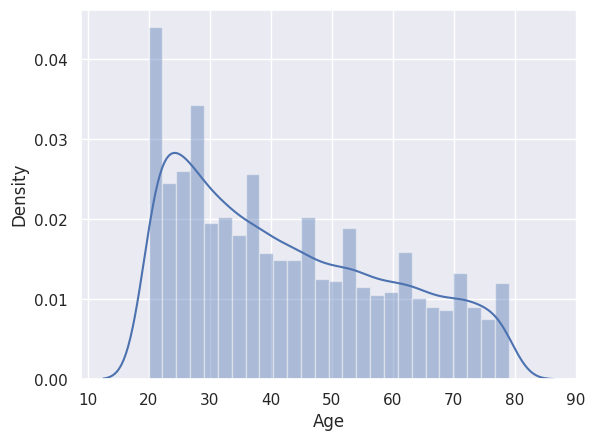

In [20]:
# Get distribution plot - Age

sns.distplot(main_df['Age'])

<ipython-input-21-60ee278808fe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_df['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

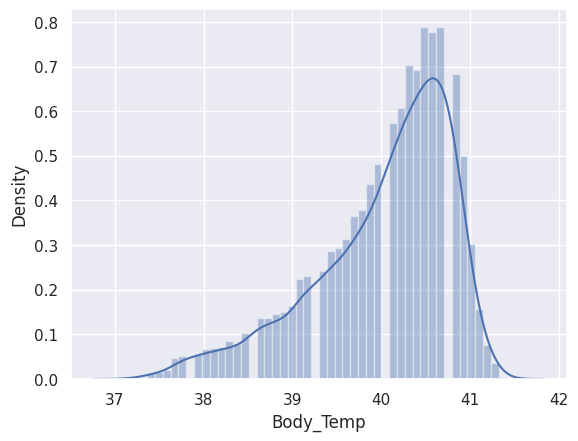

In [21]:
# Get distribution plot - Body temperature

sns.distplot(main_df['Body_Temp'])

<ipython-input-22-a374df6c4bae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

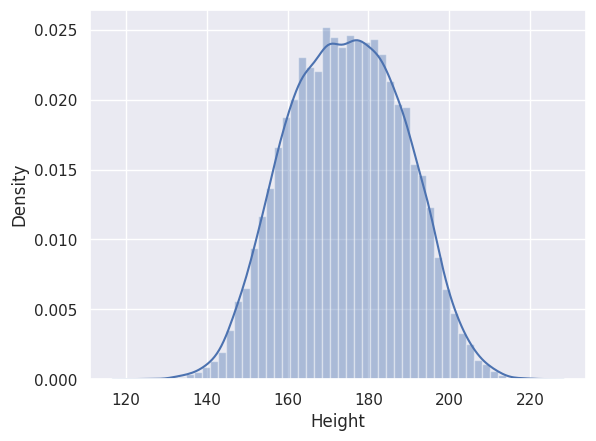

In [22]:
# Get distribution plot - Height

sns.distplot(main_df['Height'])

<ipython-input-23-44226aab23eb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

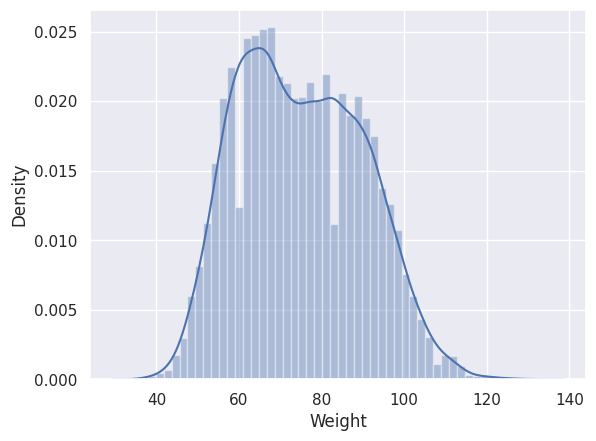

In [23]:
# Get distribution plot - weight

sns.distplot(main_df['Weight'])

### Correlation of data


*   value > 0 = positive 
*   value < 0 = negative
*   value = 0 = no correlation





In [24]:
main_df_correlation = main_df.corr()

<ipython-input-24-1bae2736c212>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  main_df_correlation = main_df.corr()


<Axes: >

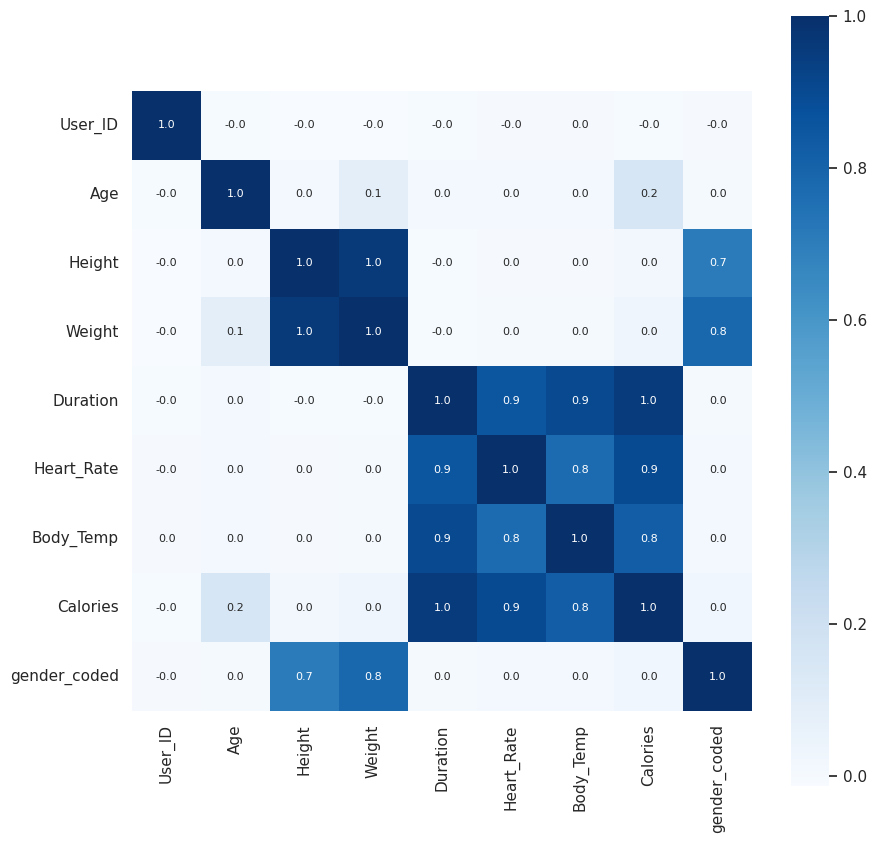

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(main_df_correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [28]:
# remove gender text based

main_df.drop(columns = ['Gender'],inplace=True)

In [29]:
main_df.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,gender_coded
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,0


## Separating Labels and Targets

In [30]:
X = main_df.drop(columns = ['Calories','User_ID'],axis='columns')
y = main_df.Calories

In [31]:
X.shape

(15000, 7)

In [32]:
X.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,gender_coded
0,68,190.0,94.0,29.0,105.0,40.8,1
1,20,166.0,60.0,14.0,94.0,40.3,0
2,69,179.0,79.0,5.0,88.0,38.7,1
3,34,179.0,71.0,13.0,100.0,40.5,0
4,27,154.0,58.0,10.0,81.0,39.8,0


In [33]:
y.shape

(15000,)

In [34]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [35]:
# Data split into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
print(X_train,X_test,y_train,y_test)

       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  gender_coded
1154    38   169.0    67.0       3.0        85.0       38.5             0
9804    30   194.0    96.0       9.0        91.0       39.6             1
7919    78   182.0    79.0       7.0        84.0       39.4             0
4854    50   171.0    77.0      29.0       111.0       40.8             1
5947    32   172.0    66.0      29.0       105.0       40.8             0
...    ...     ...     ...       ...         ...        ...           ...
11798   49   178.0    71.0      12.0        98.0       39.9             0
13896   67   159.0    58.0      23.0       101.0       40.4             0
6637    25   167.0    64.0      20.0       100.0       40.4             0
2575    36   167.0    64.0      28.0       108.0       40.8             0
7336    30   187.0    88.0      10.0        94.0       40.2             1

[12000 rows x 7 columns]        Age  Height  Weight  Duration  Heart_Rate  Body_Temp  gender_coded
7592    41  

## Model Training

In [37]:
model = XGBRegressor()

In [38]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: >

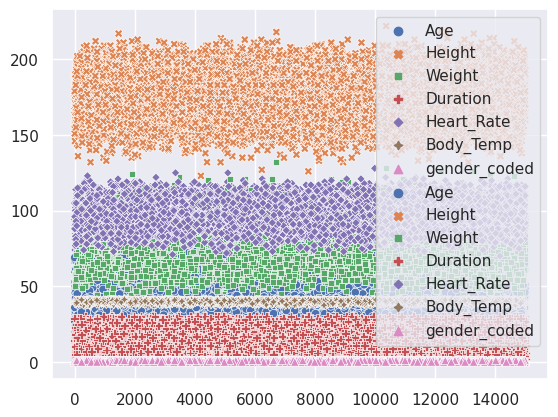

In [41]:
sns.scatterplot(X_train)
sns.scatterplot(X_test)

In [42]:
y_pred = model.predict(X_test)

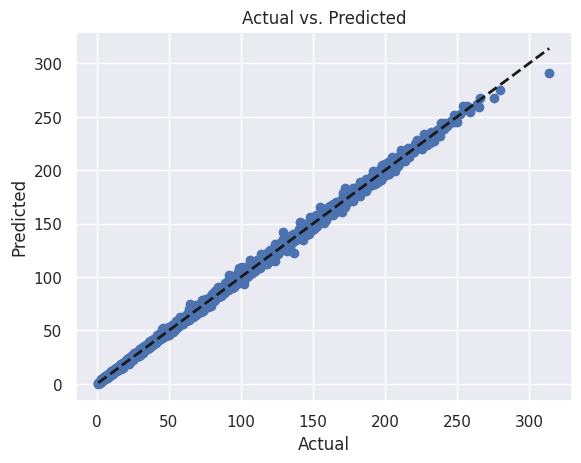

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


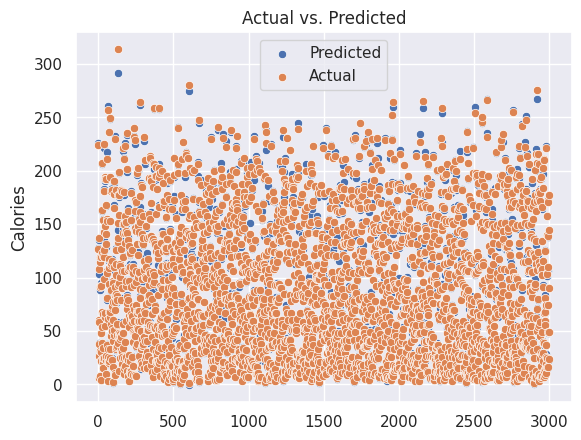

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# assuming y_pred and y_test are numpy arrays or pandas series
sns.scatterplot(x=range(len(y_pred)), y=y_pred)
sns.scatterplot(x=range(len(y_test)), y=y_test)
plt.legend(['Predicted', 'Actual'])
plt.title('Actual vs. Predicted')
plt.show()


In [48]:
# Metrics

print(f'MAE : {metrics.mean_absolute_error(y_test,y_pred)}')

MAE : 1.480544296960036
